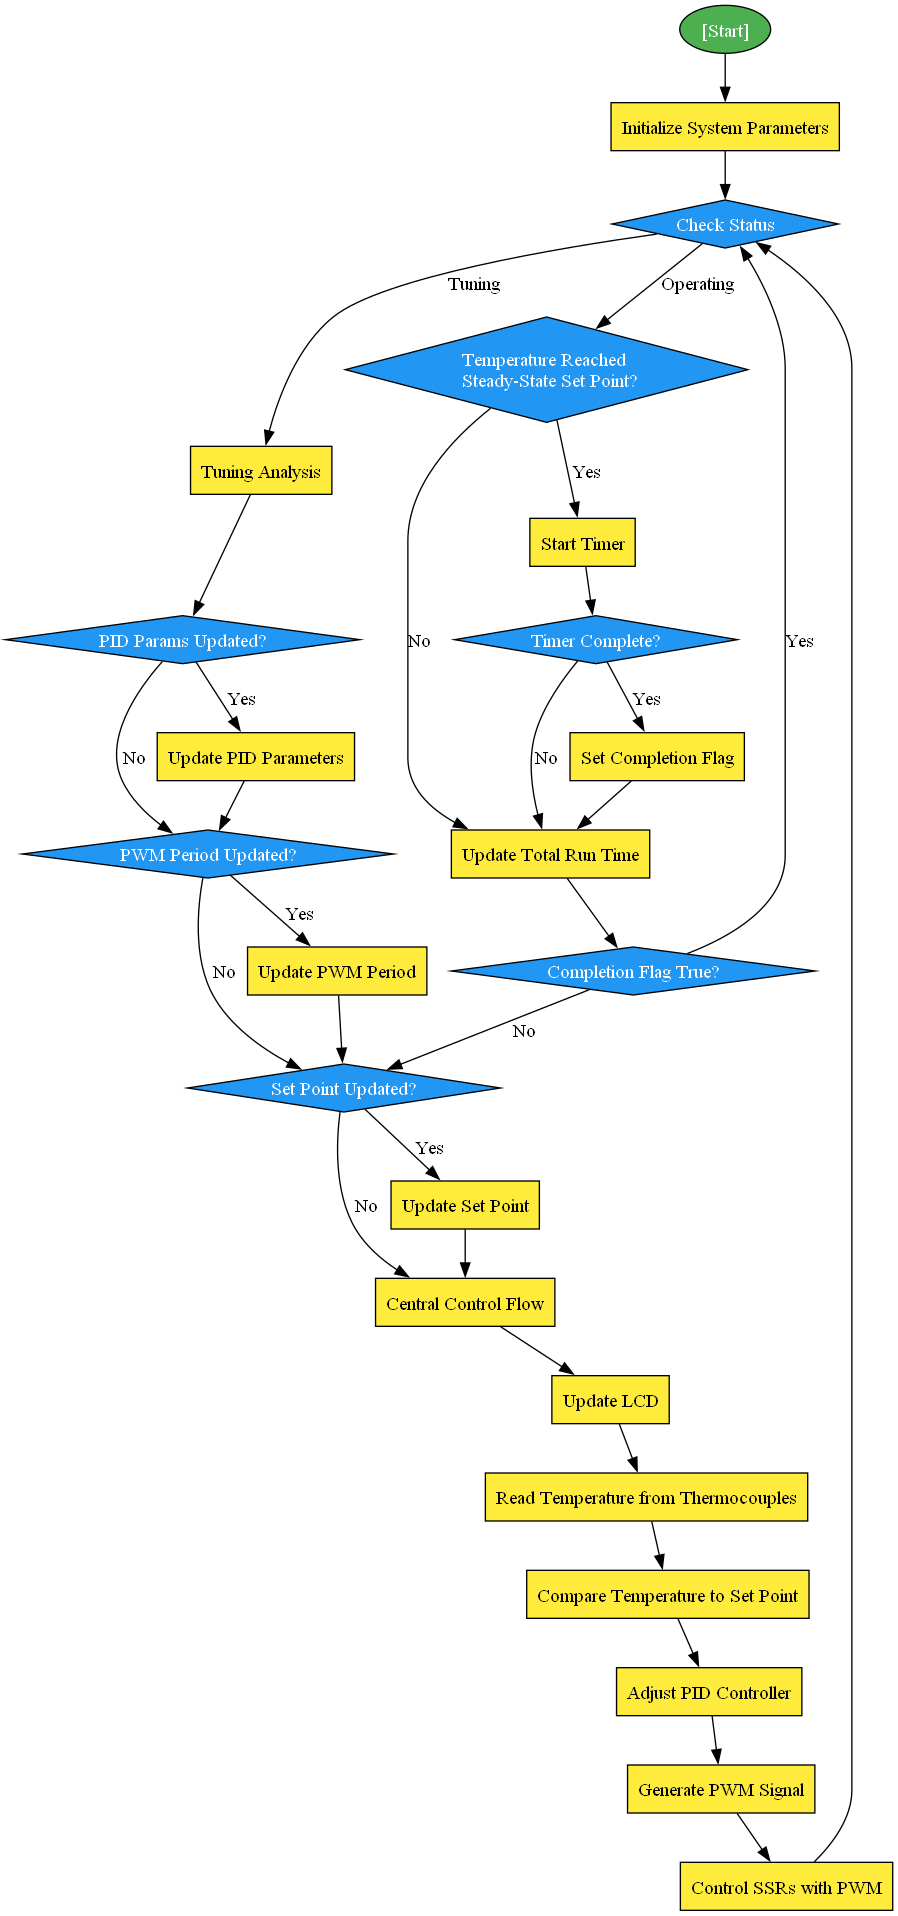

In [2]:
from graphviz import Digraph
from IPython.display import Image

# Create a new Digraph
g = Digraph('G', filename='process_control_flow.gv')
g.attr(rankdir='TB')

# Define node styles
style_action = {'shape': 'box', 'style': 'filled', 'fillcolor': '#FFEB3B'}
style_decision = {'shape': 'diamond', 'style': 'filled', 'fillcolor': '#2196F3', 'fontcolor': 'white'}
style_start = {'shape': 'ellipse', 'style': 'filled', 'fillcolor': '#4CAF50', 'fontcolor': 'white'}

# Nodes
g.node('Start', '[Start]', **style_start)
g.node('Init', 'Initialize System Parameters', **style_action)
g.node('ModeCheck', 'Check Status', **style_decision)
g.node('TuningAnalysis', 'Tuning Analysis', **style_action)
g.node('CheckPIDParams', 'PID Params Updated?', **style_decision)
g.node('UpdatePIDParams', 'Update PID Parameters', **style_action)
g.node('CheckPWMPeriod', 'PWM Period Updated?', **style_decision)
g.node('UpdatePWMPeriod', 'Update PWM Period', **style_action)
g.node('SetPointOp', 'Set Point Updated?', **style_decision)
g.node('UpdateSetPointOp', 'Update Set Point', **style_action)
g.node('CentralFlow', 'Central Control Flow', **style_action)
g.node('UpdateLCD', 'Update LCD', **style_action)
g.node('ReadTemp', 'Read Temperature from Thermocouples', **style_action)
g.node('Compare', 'Compare Temperature to Set Point', **style_action)
g.node('PIDControl', 'Adjust PID Controller', **style_action)
g.node('PWM', 'Generate PWM Signal', **style_action)
g.node('SSRControl', 'Control SSRs with PWM', **style_action)
g.node('TempReachedOp', 'Temperature Reached \n Steady-State Set Point?', **style_decision)
g.node('StartTimerOp', 'Start Timer', **style_action)
g.node('TimerExpiredOp', 'Timer Complete?', **style_decision)
g.node('StopTimerOp', 'Set Completion Flag', **style_action)
g.node('UpdateTotalRunTime', 'Update Total Run Time', **style_action)
g.node('CheckCompletion', 'Completion Flag True?', **style_decision)

# Edges
g.edges([('Start', 'Init'), ('Init', 'ModeCheck')])
g.edge('ModeCheck', 'TuningAnalysis', label='Tuning')
g.edge('TuningAnalysis', 'CheckPIDParams')
g.edge('CheckPIDParams', 'UpdatePIDParams', label='Yes')
g.edge('CheckPIDParams', 'CheckPWMPeriod', label='No')
g.edge('UpdatePIDParams', 'CheckPWMPeriod')
g.edge('CheckPWMPeriod', 'UpdatePWMPeriod', label='Yes')
g.edge('CheckPWMPeriod', 'SetPointOp', label='No')
g.edge('UpdatePWMPeriod', 'SetPointOp')
g.edge('SetPointOp', 'UpdateSetPointOp', label='Yes')
g.edge('UpdateSetPointOp', 'CentralFlow')
g.edge('SetPointOp', 'CentralFlow', label='No')
g.edges([('CentralFlow', 'UpdateLCD'), ('UpdateLCD', 'ReadTemp'), ('ReadTemp', 'Compare'), 
         ('Compare', 'PIDControl'), ('PIDControl', 'PWM'), ('PWM', 'SSRControl'), ('SSRControl', 'ModeCheck')])
g.edge('ModeCheck', 'TempReachedOp', label='Operating')
g.edge('TempReachedOp', 'StartTimerOp', label='Yes')
g.edge('TempReachedOp', 'UpdateTotalRunTime', label='No')
g.edge('StartTimerOp', 'TimerExpiredOp')
g.edge('TimerExpiredOp', 'StopTimerOp', label='Yes')
g.edge('TimerExpiredOp', 'UpdateTotalRunTime', label='No')
g.edge('StopTimerOp', 'UpdateTotalRunTime')
g.edge('UpdateTotalRunTime', 'CheckCompletion')
g.edge('CheckCompletion', 'SetPointOp', label='No')
g.edge('CheckCompletion', 'ModeCheck', label='Yes')

# Render and display the image
g.format = 'png'
img_path = g.render()  # This will save the image to a file
Image(filename=img_path)
